In [1]:
import os
import IPython
import librosa as lr
import numpy as np
from datetime import datetime
from packaging import version
import tensorboard
import keras
from keras import layers
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
from librosa import display
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dense,Activation,Conv2DTranspose
import time
from sklearn import preprocessing
from scipy.fft import fft,fftfreq

In [2]:
path = 'C:/Users/erikv/Desktop/IP/samples/' #path where the samples are stored'''
dirs = os.listdir(path) #open the directory using os library'''

def rosaspec(sound, NFFT): #defined functions for extracting the spectogram of a sound wave'''
    sound = np.concatenate((np.zeros(int(NFFT/2)),sound,np.zeros(int(NFFT/2))))
    spec_c = lr.stft(sound, n_fft=NFFT, hop_length=int(NFFT/2), win_length=None, window='hann', center=False)
    return np.concatenate((np.expand_dims(np.real(spec_c),2),np.expand_dims(np.imag(spec_c),2)),axis=2)

def irosaspec(spec,NFFT): #defined function for extracting a soundwave from a spectogram'''
    spec_c = spec[:,:,0].squeeze() + 1j* spec[:,:,1].squeeze()
    return lr.istft(spec_c, hop_length=int(NFFT/2), win_length=None, window='hann', center=False)[int(NFFT/2):-int(NFFT/2)]

autoencoder = tf.keras.models.load_model('autoencoder_v26')
encoder = autoencoder.get_layer('encoder')
decoder = autoencoder.get_layer('decoder')
visualizer = tf.keras.models.load_model('visualizer')
shortener = visualizer.get_layer('shortener')
reshaper = visualizer.get_layer('reshaper')
print ('done')

def fftpl(audio,sr):
    n = len(audio)
    T = 1/sr
    yf = fft(audio)
    xf = fftfreq(n,T)[:n//2]
    fig,ax = plt.subplots()
    A = ax.plot(xf,2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("frequency")
    plt.ylabel("magnitude")
    plt.axis([0,8000,-0.005,0.05])
    return A
    

done


C:\Users\erikv\AppData\Local\Temp/ipykernel_1704/543645511.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


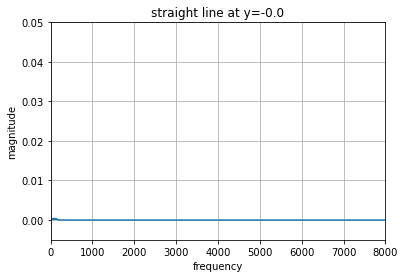

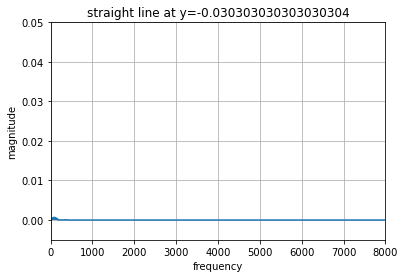

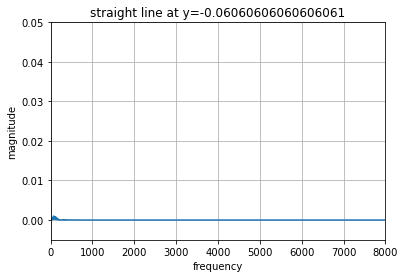

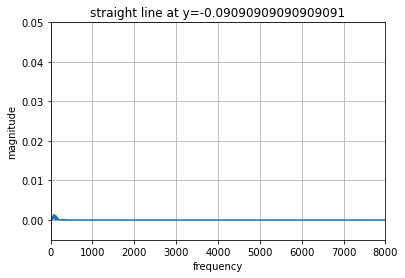

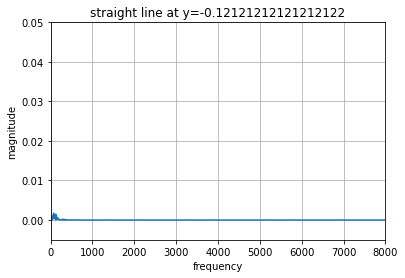

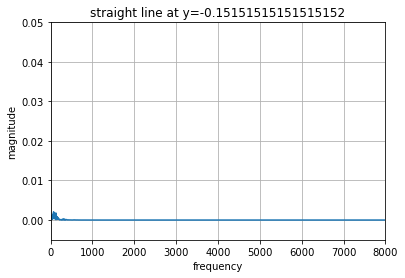

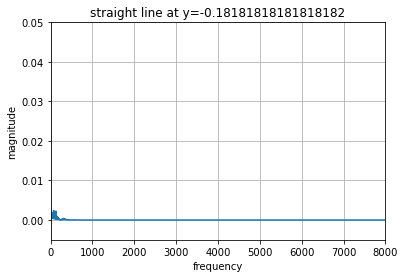

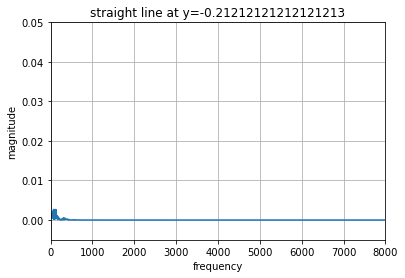

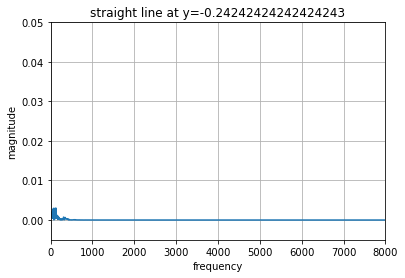

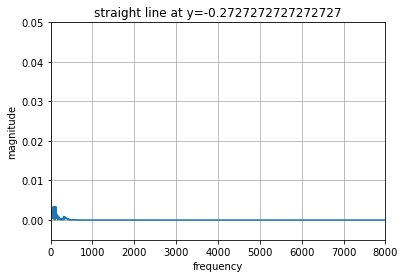

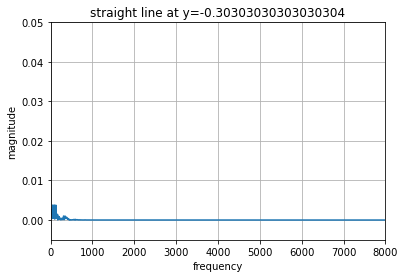

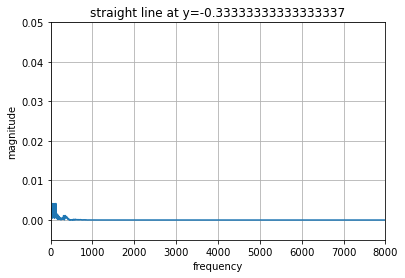

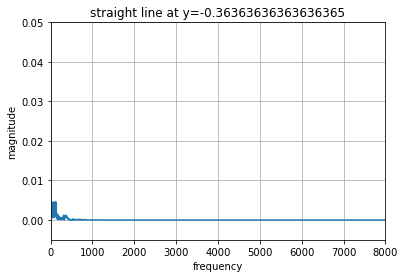

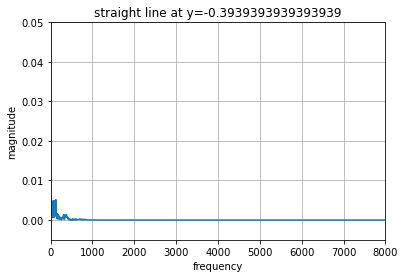

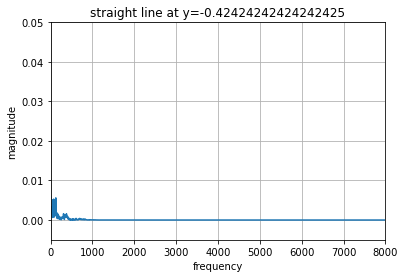

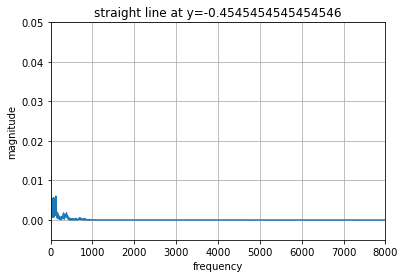

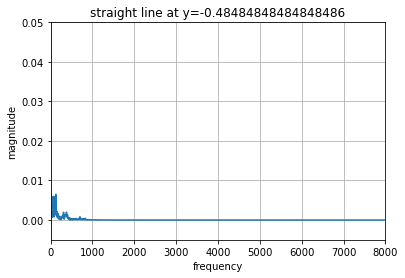

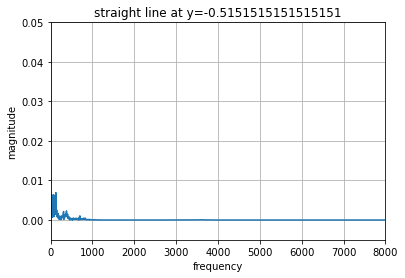

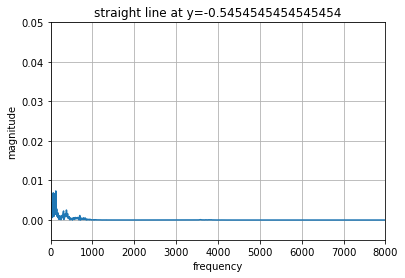

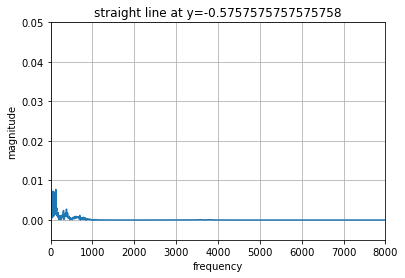

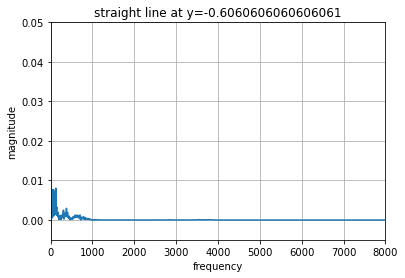

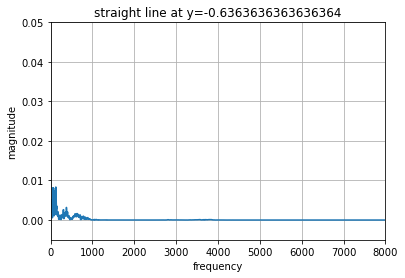

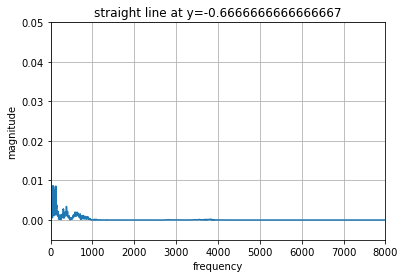

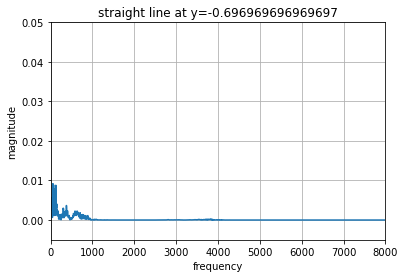

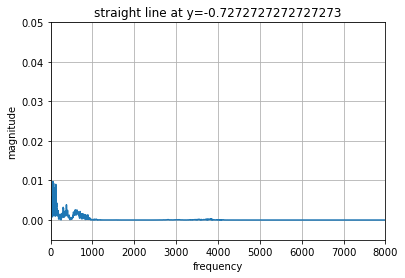

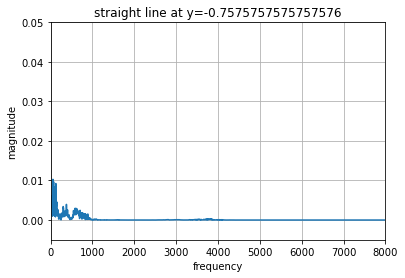

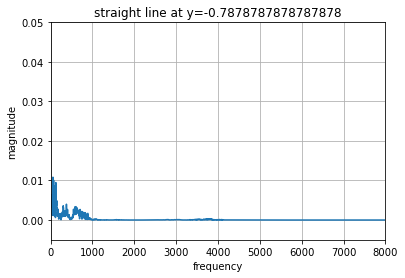

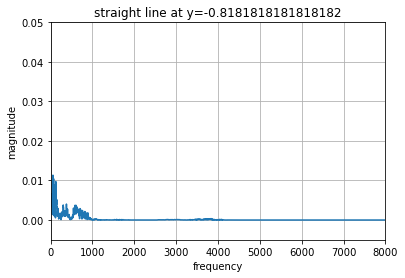

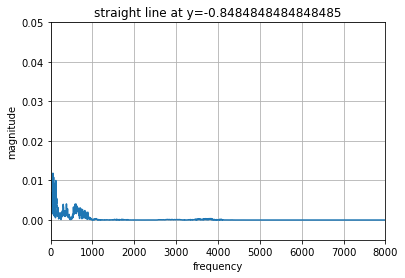

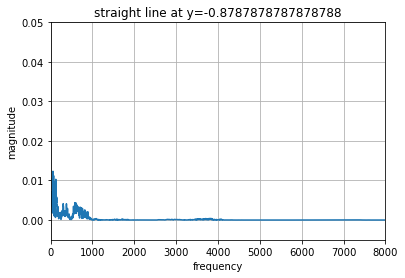

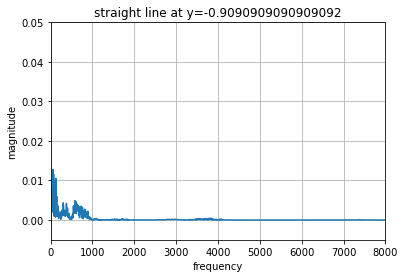

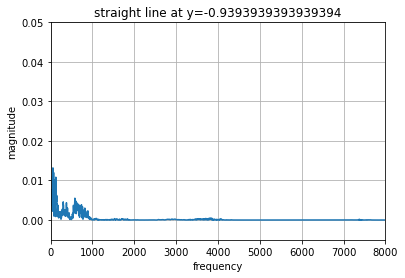

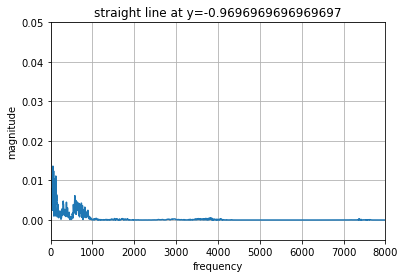

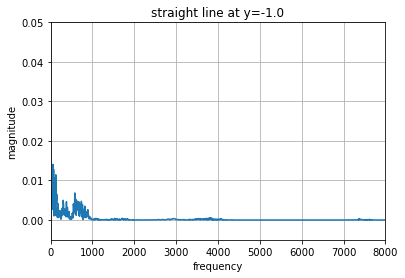

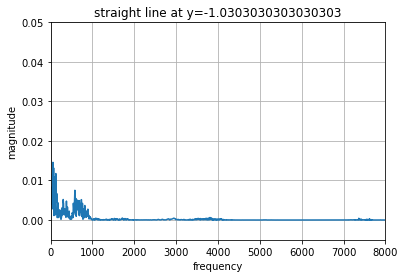

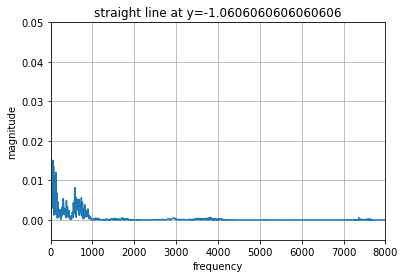

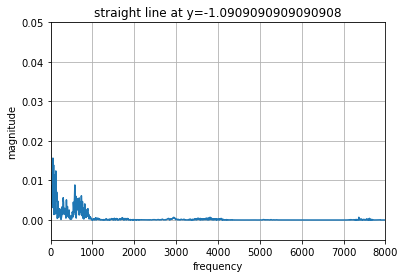

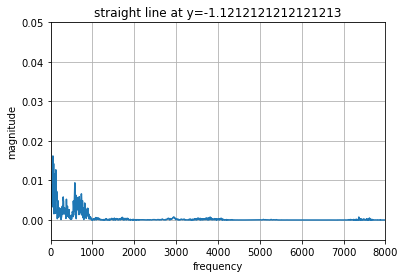

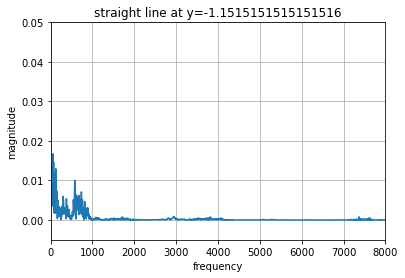

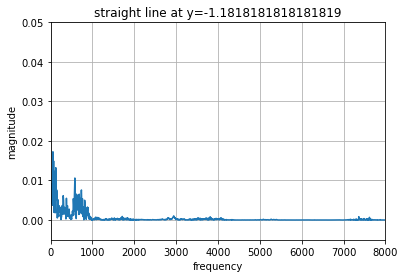

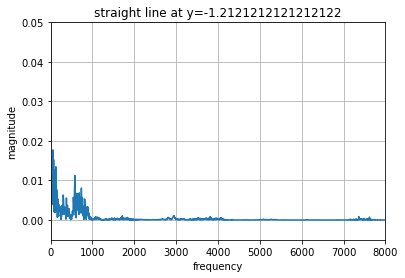

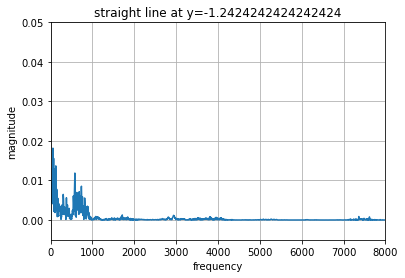

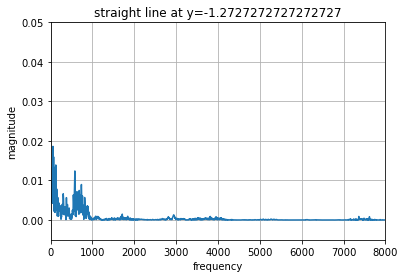

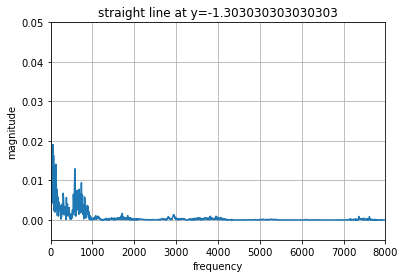

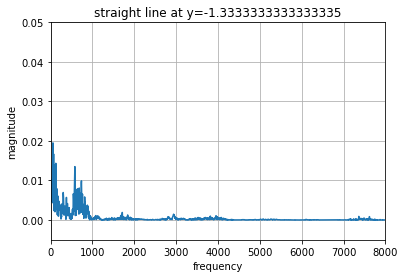

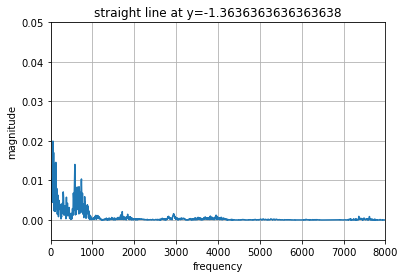

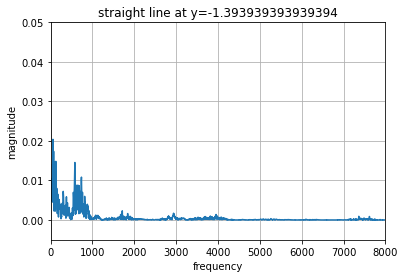

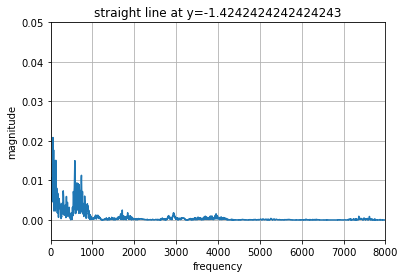

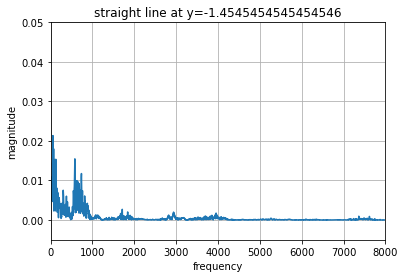

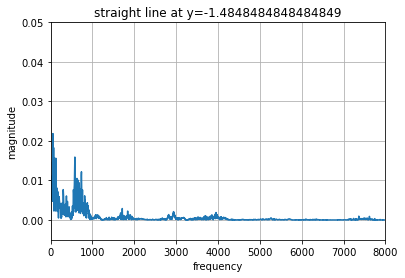

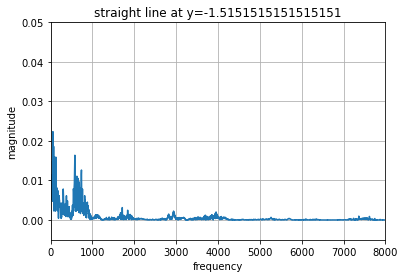

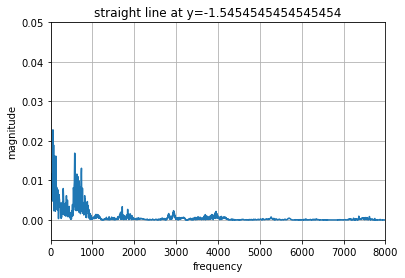

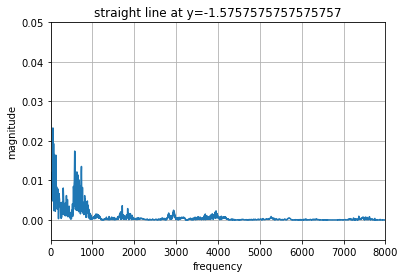

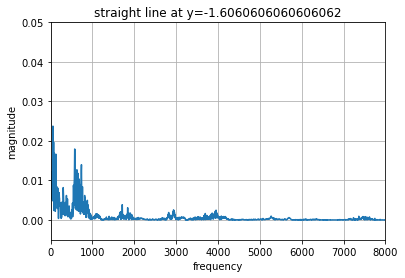

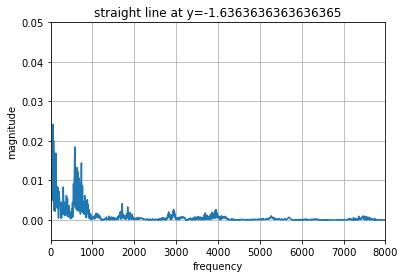

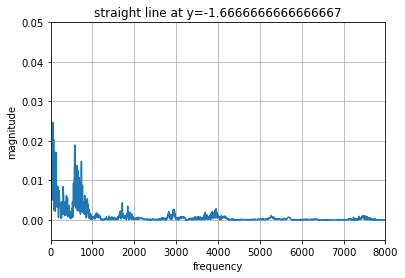

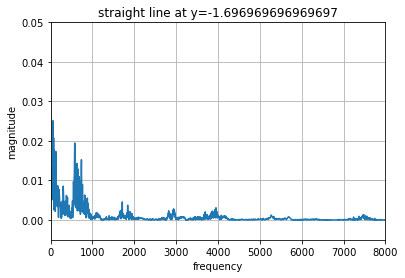

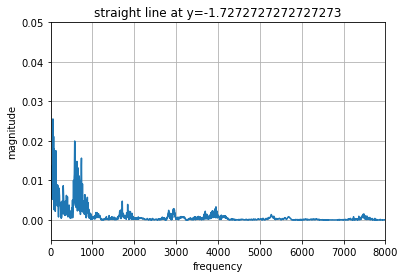

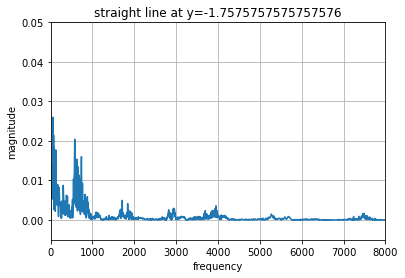

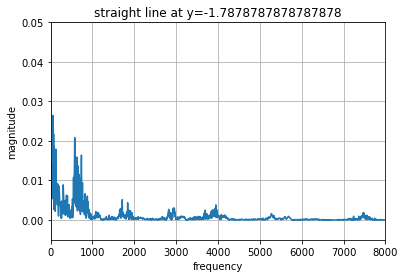

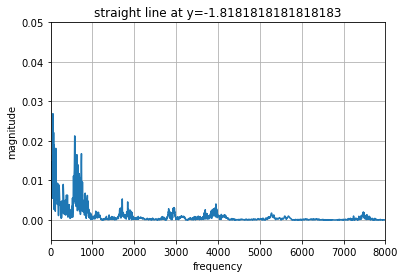

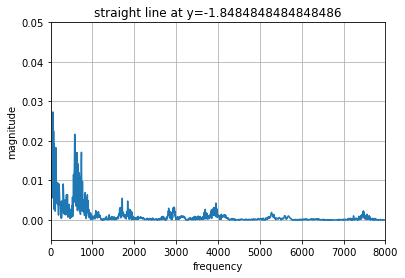

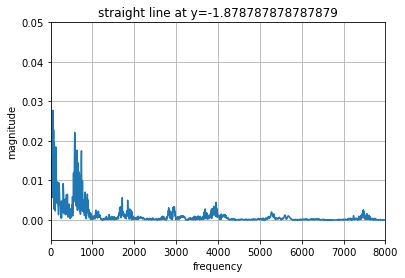

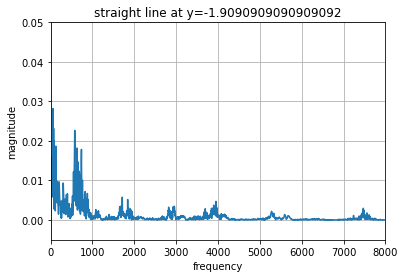

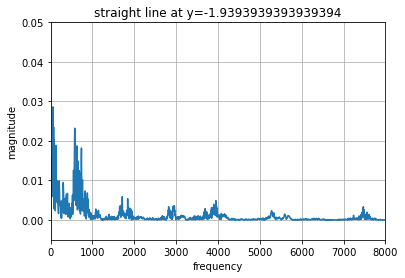

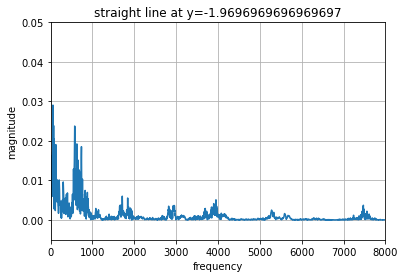

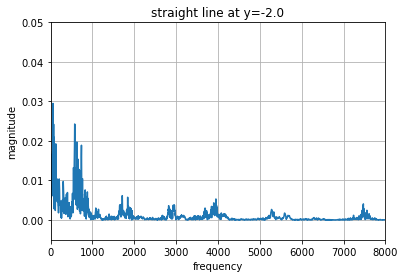

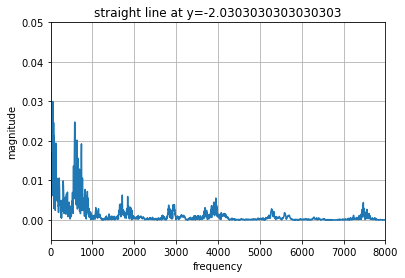

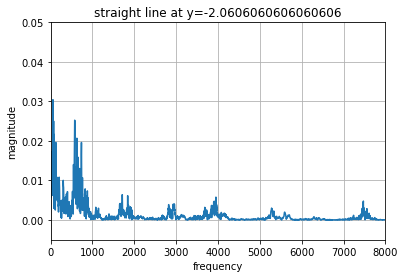

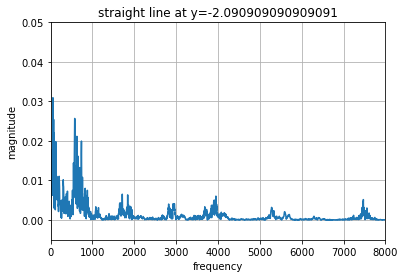

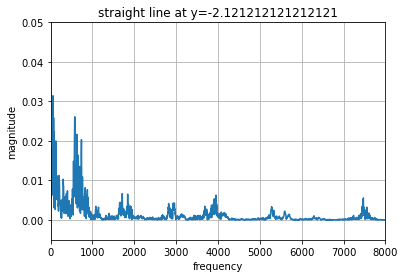

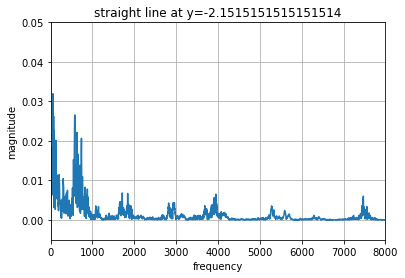

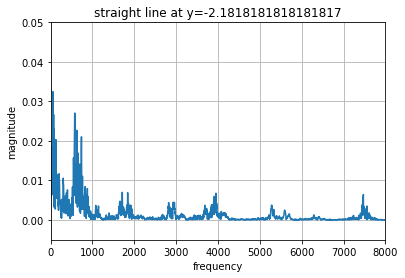

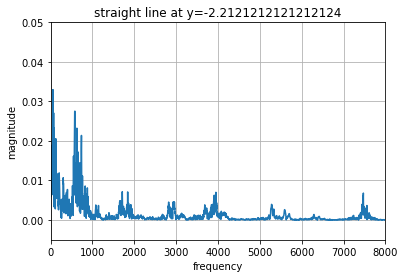

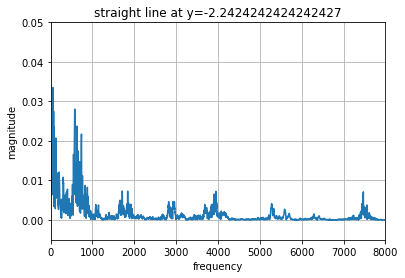

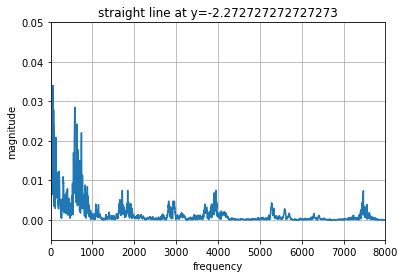

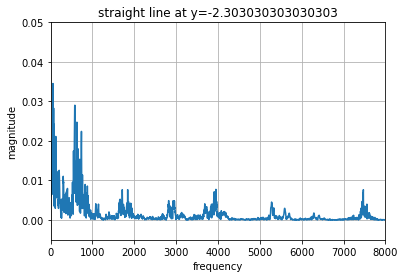

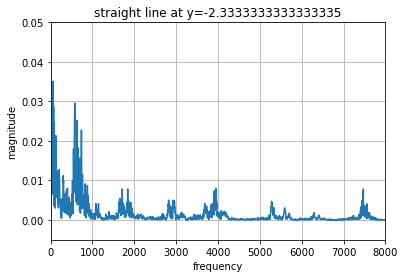

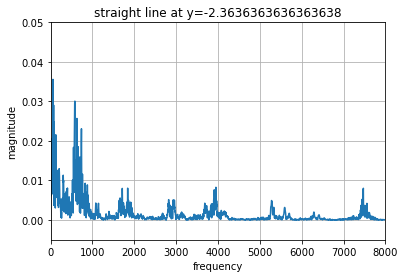

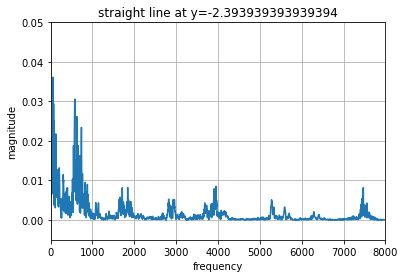

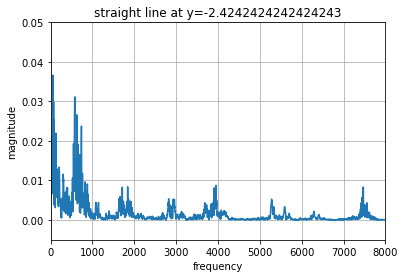

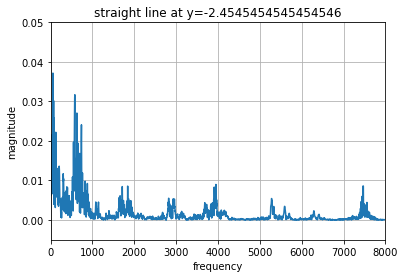

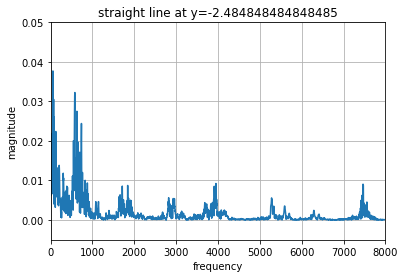

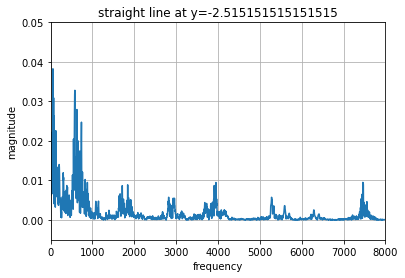

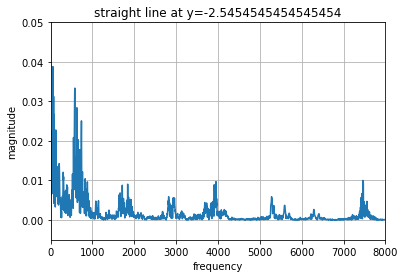

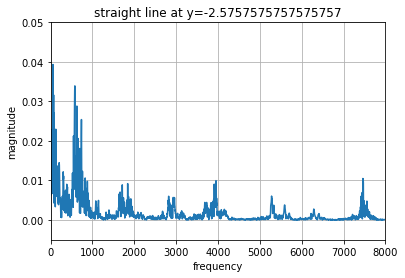

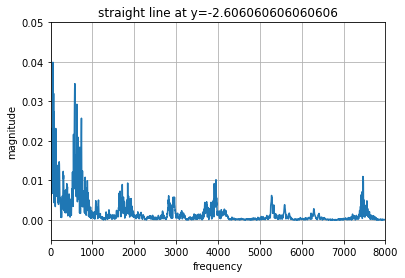

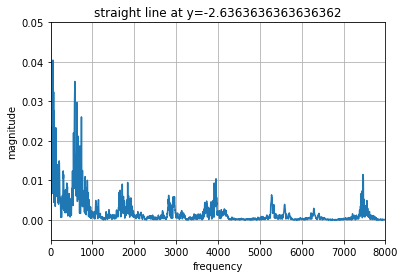

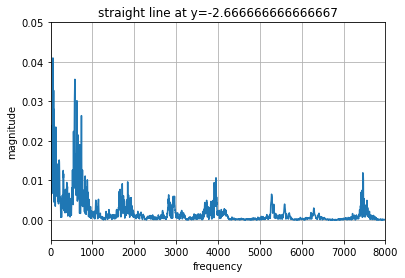

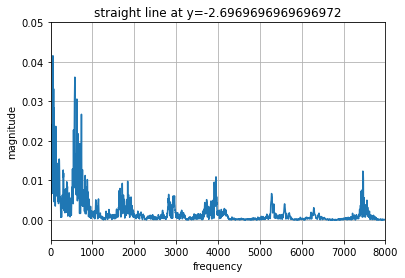

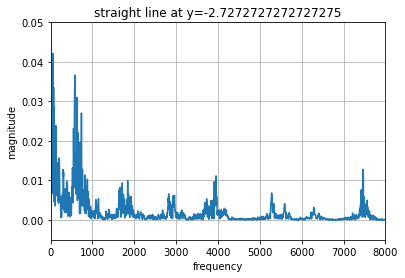

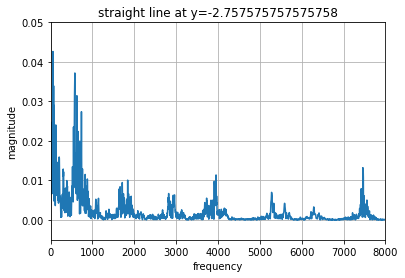

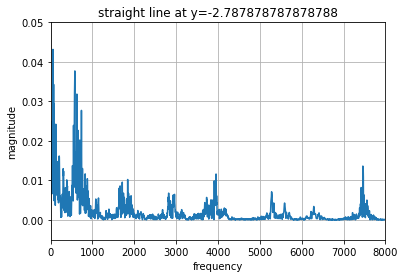

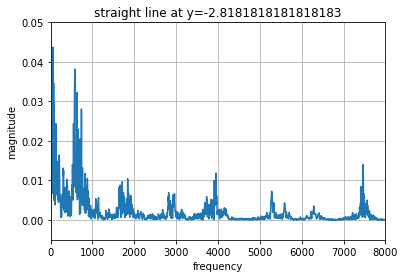

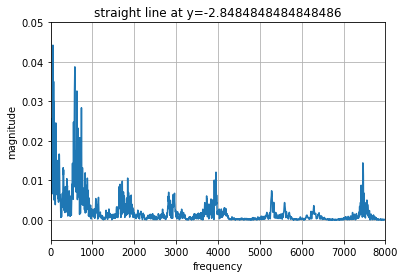

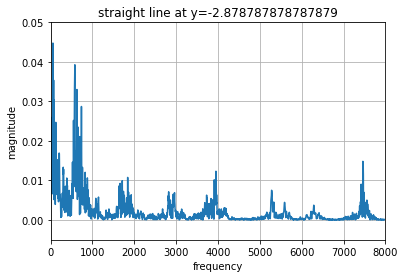

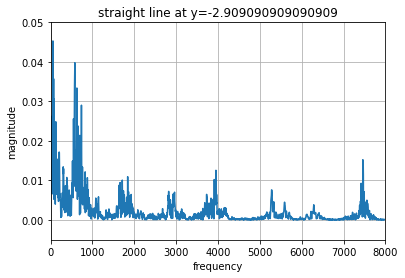

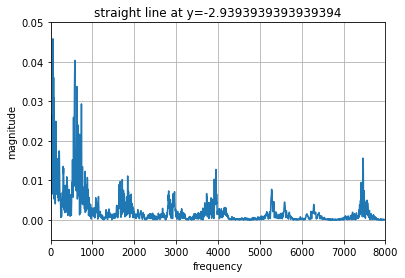

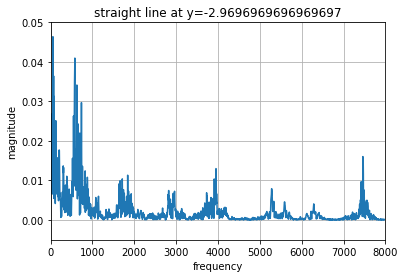

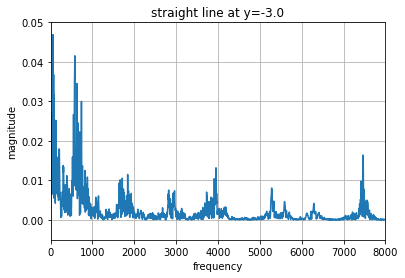

In [9]:
my_path = 'C:/Users/erikv/Desktop/IP/FFTs'
NFFT =  int(1022/8)
sroriginal1 = 16000
from numpy import linspace as lin
X = lin(1,1,256)
for m in lin(0,3,100):
    probe = -m*X# Here I use a given function (in this case a sine function)
    #for i in range*(255,256): #here I can modify certain values to follow a different function
        #probe[i] = -2*np.cos(X[i])
    shortened_vector = probe #then i use this modified vector and run it through all the decoders and the inverse 
                             #spectogram function
    reshaped_vector = np.array([reshaper(np.array([probe]))])
    decoded_arrayfromvect = np.array([decoder(reshaped_vector[0])])
    decoded_audiofromvect = irosaspec(decoded_arrayfromvect[0,0],NFFT)
    fftpl(decoded_audiofromvect, sroriginal1)

    #IPython.display.display(IPython.display.Audio(decoded_audiofromvect,rate = sroriginal1))
    my_file = str(int(m*100))+'.png'
    plt.title('straight line at y=-'+str(m))
    plt.savefig(os.path.join(my_path, my_file))
